In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# classifier libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# importing data
data = pd.read_csv(r"C:\Users\hp\Desktop\Data analysis\Python\Project\creditcard\creditcard.csv")

In [3]:
# inspecting the first 5 rows of the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# checking the numbe rof rows and columns 
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# statistical distribution of data
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# checking the distribution of the class feature values
data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

#### More than 90% of the dataset is in the class 0 category i.e highly unbalanced, the data can not be fitted into the ML model 

In [10]:
# handling data imbalance
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [13]:
print(legit.shape, fraud.shape)

(284315, 31) (492, 31)


In [14]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
# comapre values for both transaction
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [17]:
# undersampling the dataset inorder to handle data imbalance
legit_sample = legit.sample(n=492)

In [18]:
# merging the legit-sample to fraud dataset
df = pd.concat((legit_sample, fraud), axis=0)

In [20]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
203120,134660.0,-0.144871,0.328966,0.854903,0.469304,0.374310,-0.382498,1.321623,-0.390108,-0.093037,...,0.173855,0.600840,0.164875,-0.021103,-0.192148,-0.764948,-0.089555,-0.151425,128.64,0
84236,60218.0,1.212211,0.249586,0.261649,0.651231,-0.253871,-0.621241,-0.043090,-0.021466,0.145496,...,-0.268735,-0.778791,0.167940,0.012823,0.117127,0.126682,-0.011666,0.025788,1.98,0


In [21]:
df.shape

(984, 31)

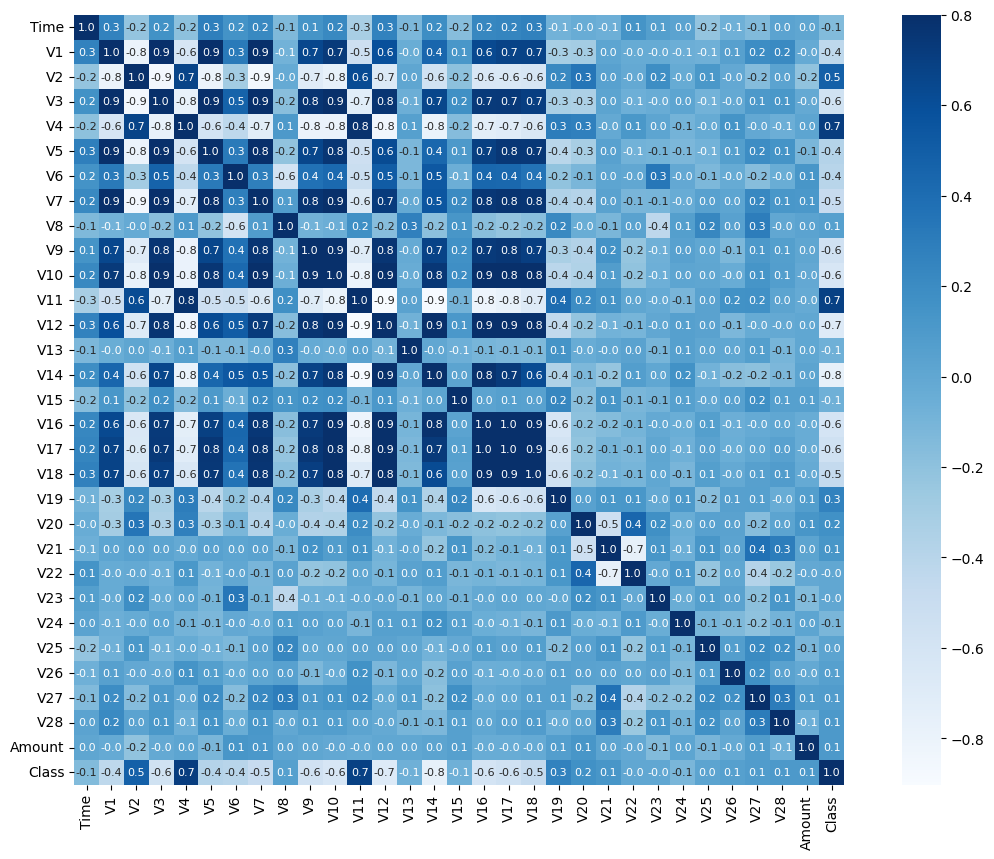

In [24]:
# plotting correlation chart
plt.figure(figsize=(15,10))
a = df.corr()
sns.heatmap(a, vmax=.8, square=True, annot=True, fmt='.1f', cbar=True, annot_kws={'size':8}, cmap='Blues');

In [25]:
# seperating data into label and target
x = df.drop(columns=['Class'], axis=1)
y = df['Class']

In [26]:
# scaling x dataset
scaler = MinMaxScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

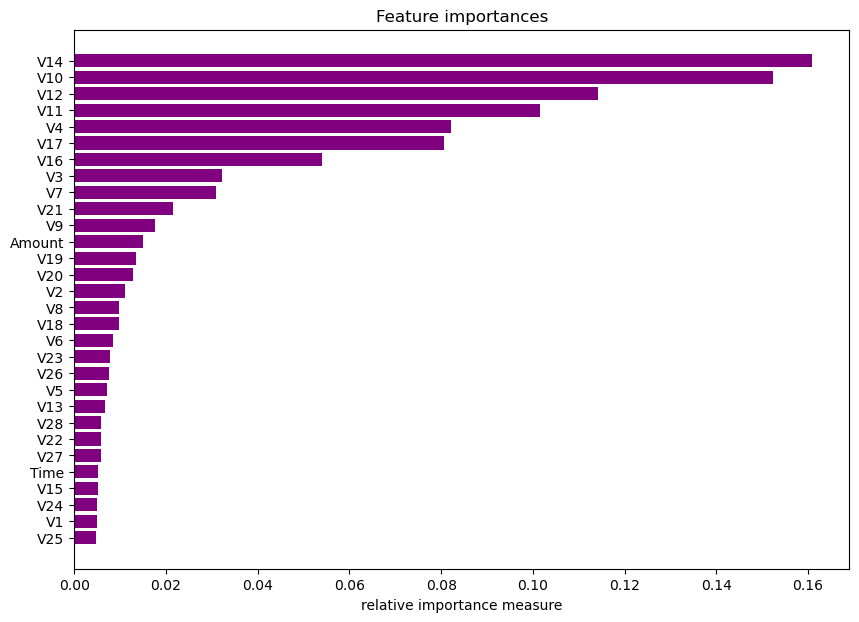

In [27]:
# plotting key features based on importance
model = RandomForestClassifier()
model.fit(x, y)
importances = model.feature_importances_
sort_imp = np.argsort(importances)
names = list(x.columns)

#plot feature importance chart
plt.figure(figsize=(10,7))
plt.barh(range(len(sort_imp)),importances[sort_imp], color="purple")
plt.yticks(range(len(sort_imp)),[names[x] for x in sort_imp])
plt.title("Feature importances")
plt.xlabel("relative importance measure");

In [61]:
# List of models with their corresponding hyperparameters
models_parameters = [
    (LogisticRegression(), {'C': [1, 5, 10, 20], 'max_iter': [1000, 5000, 10000]}),
    (SVC(), {'kernel': ['linear', 'poly', 'sigmoid', 'rbf'], 'C': [1, 5, 10, 20]}),
    (RandomForestClassifier(random_state=0), {'n_estimators': [10, 20, 50, 100]}),
    (DecisionTreeClassifier(), {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]})
]

def modelSelection(models_parameters):
    results = []
    
    for model, params in models_parameters:
        classifier = GridSearchCV(model, params, cv=5)
        classifier.fit(x, y)
        
        results.append({
            'model used': model,
            'highest score': classifier.best_score_,
            'best hyperparameters': classifier.best_params_
        })
        
    return pd.DataFrame(results, columns=['model used', 'highest score', 'best hyperparameters'])

In [62]:
modelSelection(models_parameters)

,model used,highest score,best hyperparameters
0,LogisticRegression(),0.933922,"{'C': 20, 'max_iter': 1000}"
1,SVC(),0.934937,"{'C': 20, 'kernel': 'linear'}"
2,RandomForestClassifier(random_state=0),0.942065,{'n_estimators': 20}
3,DecisionTreeClassifier(),0.916658,"{'max_depth': 5, 'min_samples_split': 5}"


#### Selecting LogisticRegression with optimized parameter

In [37]:
# splitting data into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=1) 

In [38]:
print(x.shape, x_train.shape, x_test.shape)

(984, 30) (787, 30) (197, 30)


In [53]:
# Selecting logistic regression
model = LogisticRegression(C=20, max_iter=1000)

In [54]:
model.fit(x_train, y_train)

LogisticRegression(C=20, max_iter=1000)

In [55]:
# Model accuracy evaluation
train_pred = model.predict(x_train)
print(classification_report(train_pred, y_train))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       417
           1       0.92      0.98      0.95       370

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787



In [56]:
# Model accuracy evaluation
test_pred = model.predict(x_test)
print(classification_report(test_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       109
           1       0.88      0.99      0.93        88

    accuracy                           0.93       197
   macro avg       0.93      0.94      0.93       197
weighted avg       0.94      0.93      0.93       197



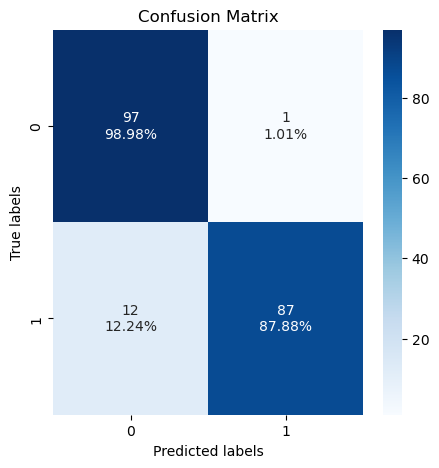

In [57]:
# Building a confusion matrix for the model
cm = confusion_matrix(y_test, test_pred)

# Calculate percentages for each cell in the confusion matrix
labels = np.array([
    ["{0:0.0f}\n{1:.2%}".format(item, item / cm.sum(axis=1)[i]) for i, item in enumerate(row)]
    for row in cm
])

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("True labels")
plt.xlabel("Predicted labels")
plt.show();

In [58]:
pd1 = pd.Series(test_pred)
pdf = pd.DataFrame(pd1)
pdf.value_counts()

0    109
1     88
Name: count, dtype: int64

In [59]:
# building a predictive system

def predict_card_status(data, model, scaler):
    # Convert input data type to numpy array
    input_arr = np.asarray(data)
    
    # Reshape the array because we are predicting for 1 instance
    input_arr2 = input_arr.reshape(1, -1)
    
    # Standardize data
    stdz_input = scaler.transform(input_arr2)
    
    # Make prediction
    prediction = model.predict(stdz_input)
    
    if prediction[0] == 0:
        print(prediction[0], " - Transaction is legit")
    else:
        print (prediction[0], " - Transaction is a fraud")

In [60]:
input_data = np.array([[1.32000000e+02, -1.57135931e+00,  1.68750803e+00,  7.34670438e-01,
        1.29334960e+00, -2.17531663e-01, -2.67746796e-03,  1.47364181e-01,
        5.15361979e-01, -3.72441613e-01,  7.80206782e-02, -5.92494907e-01,
        9.97941010e-01,  1.10932839e+00,  6.00476234e-02,  8.61407956e-02,
       -1.14989267e+00,  7.65198254e-01, -8.10588623e-01,  7.37550436e-01,
       -9.36135324e-02,  4.85493140e-02,  3.77255527e-01, -3.04355120e-02,
        1.17608128e-01, -6.05200767e-02, -2.96549880e-01, -4.81570297e-01,
       -1.67897497e-01,  1.00000000e+01]])
result = predict_card_status(input_data, model, scaler)

0  - Transaction is legit


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [50]:
np.asarray(data.loc[200])

array([ 1.32000000e+02, -1.57135931e+00,  1.68750803e+00,  7.34670438e-01,
        1.29334960e+00, -2.17531663e-01, -2.67746796e-03,  1.47364181e-01,
        5.15361979e-01, -3.72441613e-01,  7.80206782e-02, -5.92494907e-01,
        9.97941010e-01,  1.10932839e+00,  6.00476234e-02,  8.61407956e-02,
       -1.14989267e+00,  7.65198254e-01, -8.10588623e-01,  7.37550436e-01,
       -9.36135324e-02,  4.85493140e-02,  3.77255527e-01, -3.04355120e-02,
        1.17608128e-01, -6.05200767e-02, -2.96549880e-01, -4.81570297e-01,
       -1.67897497e-01,  1.00000000e+01,  0.00000000e+00])